In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [34]:
data = pd.read_csv('/home/code_wizard/coding_files/machine_learning_1/Assignment_dataset.csv')
data=pd.DataFrame(data)
data.columns
data.head()


,Categorical_1,Categorical_2,Feature_1,Feature_2,Feature_3,Label
0,2,1,2824.802093,2530.517100,2717.842544,4
1,1,1,908.538051,1371.403348,1480.603380,2
2,1,0,4264.296027,4085.271732,4433.111426,4
3,2,1,650.809883,1537.163058,1002.764724,0
4,2,1,743.972385,1580.194147,992.426731,0


In [58]:

continuous_features=['Feature_1','Feature_2','Feature_3']


print(continuous_features)
 

for feature in data.columns:
    if feature in continuous_features:
        data[feature]=(data[feature]-data[feature].min())/(data[feature].max()-data[feature].min())
        
data.head()

['Feature_1', 'Feature_2', 'Feature_3']


,Categorical_1,Categorical_2,Feature_1,Feature_2,Feature_3,Label
0,2,1,0.635922,0.598592,0.569223,4
1,1,1,0.193404,0.318476,0.282663,2
2,1,0,0.968341,0.974320,0.966501,4
3,2,1,0.133888,0.358534,0.171990,0
4,2,1,0.155401,0.368933,0.169595,0


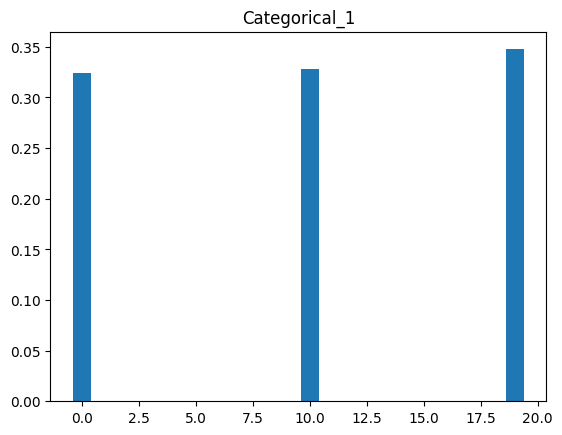

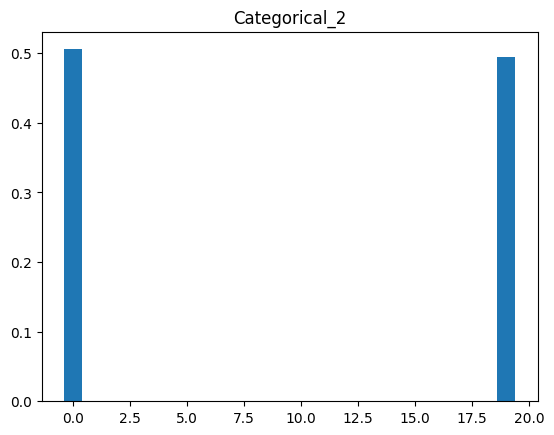

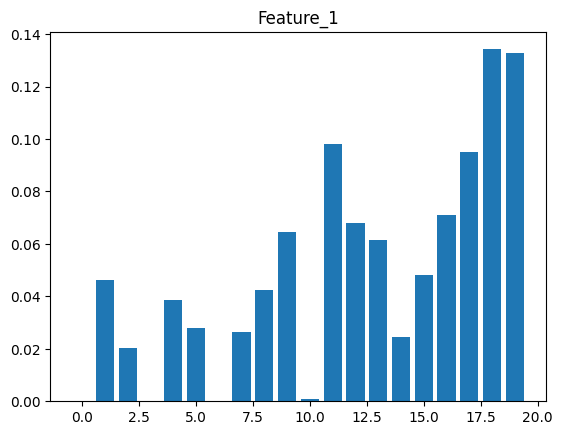

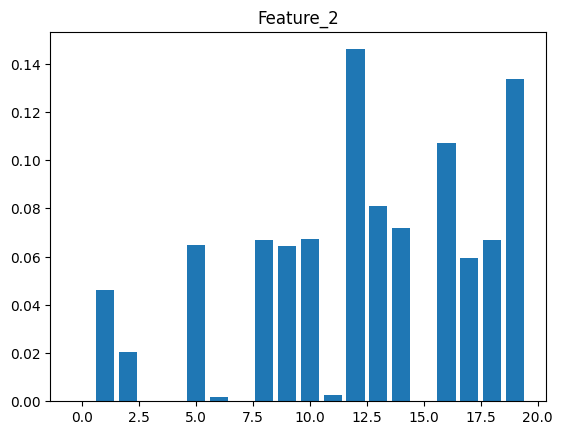

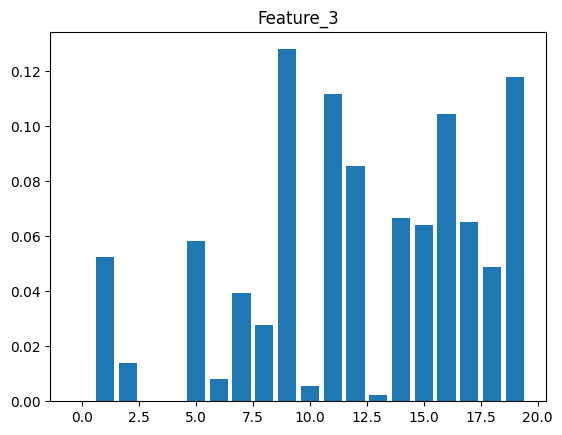

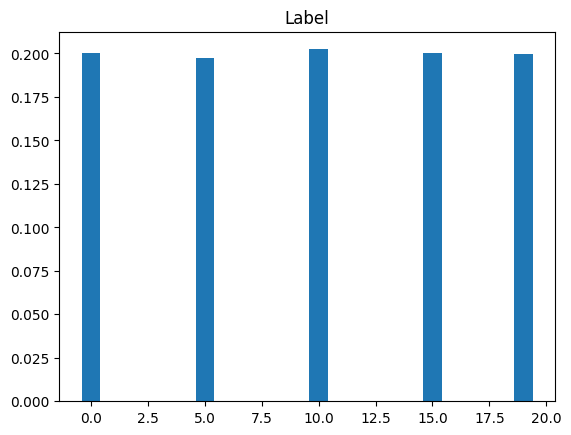

In [59]:
def bins_counts(feature):
    bins=np.linspace(data[feature].max(),data[feature].min(),20)
    bins,counts = np.unique(np.digitize(data[feature],bins),return_counts=True)
    return bins,counts/np.sum(counts)

for feature in data.columns:
    bins,counts=bins_counts(feature)
    
    plt.bar(bins,counts)
    plt.title(feature)
    plt.show()


In [37]:
def K(x):
    const = 1/np.sqrt(2*np.pi)
    term = const*np.exp(-((x**2)/2))
    return const*term


In [38]:
def get_gaussian_likelihood(x, mean, var):
    eps = 1e-6  
    coeff = 1.0 / np.sqrt(2 * np.pi * var + eps)
    exponent = np.exp(-((x - mean) ** 2) / (2 * var + eps))
    return coeff * exponent


In [39]:
def KDE_likelihood(x,feature,bandwidth = 0.04):
    s=0
    for i in range(len(data)):
        s=s+get_gaussian_likelihood(x,data[feature][i],bandwidth)
    likelihood=s/len(data)
    return likelihood

grid = np.linspace(data[feature].max(),data[feature].min(),600)







In [40]:
def visualise_kde_vs_gaussian(feature):
    
    grid = np.linspace(data[feature].max(),data[feature].min(),600)
    kde_likelihood_feature=[]
    for i in range(len(grid)):

        kde_likelihood=KDE_likelihood(grid[i],feature)
        kde_likelihood_feature.append(kde_likelihood)

    gaussian_likelihood_feature=[]
    for i in range(len(grid)):

        gaussian_likelihood = get_gaussian_likelihood(grid[i],data[feature].mean(),data[feature].std())
        gaussian_likelihood_feature.append(gaussian_likelihood)
    return kde_likelihood_feature,gaussian_likelihood_feature



In [41]:
'''for feature in data.columns:
    kde_likelihood,gaussian_likelihood = visualise_kde_vs_gaussian(feature)
    
    plt.plot(gaussian_likelihood)
    plt.plot(kde_likelihood)
    plt.legend()
    plt.title(feature)
    plt.show()'''

'for feature in data.columns:\n    kde_likelihood,gaussian_likelihood = visualise_kde_vs_gaussian(feature)\n    \n    plt.plot(gaussian_likelihood)\n    plt.plot(kde_likelihood)\n    plt.legend()\n    plt.title(feature)\n    plt.show()'

In [42]:
feature1 = data.columns[0]
feature1

'Categorical_1'

In [43]:
'''def get_kde_class_wise(x,feature,class_label,bandwidth=0.04):
    s=0
    data_new=data[feature][data['Label']==class_label]
    for i in range(len(data_new)):
        s=s+get_gaussian_likelihood(x,list(data_new)[i],bandwidth)
        likelihood=s/len(data_new)
    return likelihood

for feature in data.columns:

    grid = np.linspace(data[feature].max(),data[feature].min(),600)

    kde_class_0=[]
    for i in range(len(grid)):
        kde=get_kde_class_wise(grid[i],feature,0)
        kde_class_0.append(kde)

    kde_class_1=[]
    for i in range(len(grid)):
        kde=get_kde_class_wise(grid[i],feature,1)
        kde_class_1.append(kde)


    kde_class_025=[]
    for i in range(len(grid)):
        kde=get_kde_class_wise(grid[i],feature,0.25)
        kde_class_025.append(kde)


    kde_class_075=[]
    for i in range(len(grid)):
        kde=get_kde_class_wise(grid[i],feature,0.75)
        kde_class_075.append(kde)

    kde_class_05=[]
    for i in range(len(grid)):
        kde=get_kde_class_wise(grid[i],feature,0.5)
        kde_class_05.append(kde)

    plt.plot(grid,kde_class_0, label='class 0 KDE likelihoods')
    plt.plot(grid,kde_class_05, label='class 0.5 KDE likelihoods')
    plt.plot(grid,kde_class_025, label='class 0.25 KDE likelihoods')
    plt.plot(grid,kde_class_075, label='class 0.75 KDE likelihoods')
    plt.plot(grid,kde_class_1, label='class 1 KDE likelihoods')
    plt.xlabel('feature values')
    plt.ylabel('estimated likelihood')
    plt.title(feature)
    plt.legend()
    plt.show()'''









        




        




"def get_kde_class_wise(x,feature,class_label,bandwidth=0.04):\n    s=0\n    data_new=data[feature][data['Label']==class_label]\n    for i in range(len(data_new)):\n        s=s+get_gaussian_likelihood(x,list(data_new)[i],bandwidth)\n        likelihood=s/len(data_new)\n    return likelihood\n\nfor feature in data.columns:\n\n    grid = np.linspace(data[feature].max(),data[feature].min(),600)\n\n    kde_class_0=[]\n    for i in range(len(grid)):\n        kde=get_kde_class_wise(grid[i],feature,0)\n        kde_class_0.append(kde)\n\n    kde_class_1=[]\n    for i in range(len(grid)):\n        kde=get_kde_class_wise(grid[i],feature,1)\n        kde_class_1.append(kde)\n\n\n    kde_class_025=[]\n    for i in range(len(grid)):\n        kde=get_kde_class_wise(grid[i],feature,0.25)\n        kde_class_025.append(kde)\n\n\n    kde_class_075=[]\n    for i in range(len(grid)):\n        kde=get_kde_class_wise(grid[i],feature,0.75)\n        kde_class_075.append(kde)\n\n    kde_class_05=[]\n    for i in

In [44]:
for feature in continuous_features:
    print(feature)

Feature_1
Feature_2
Feature_3


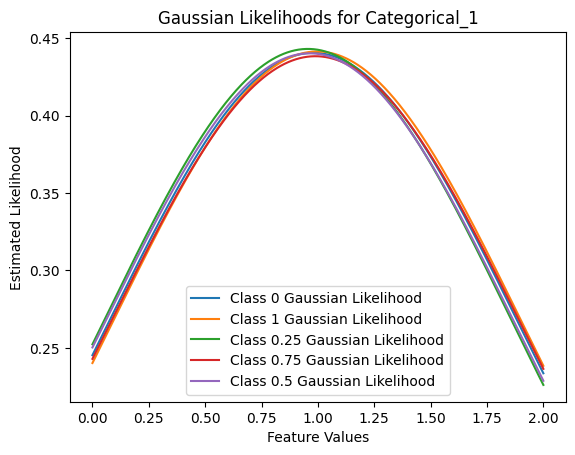

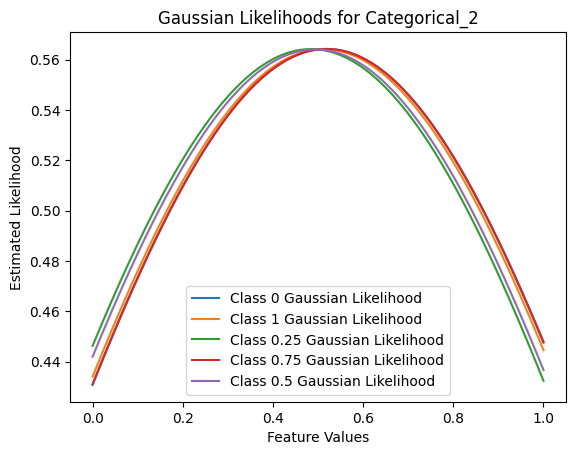

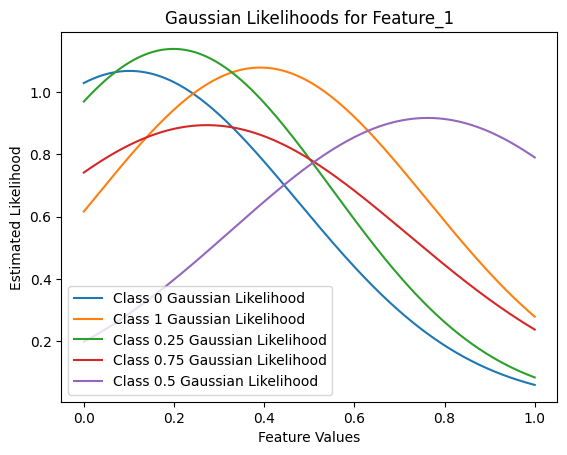

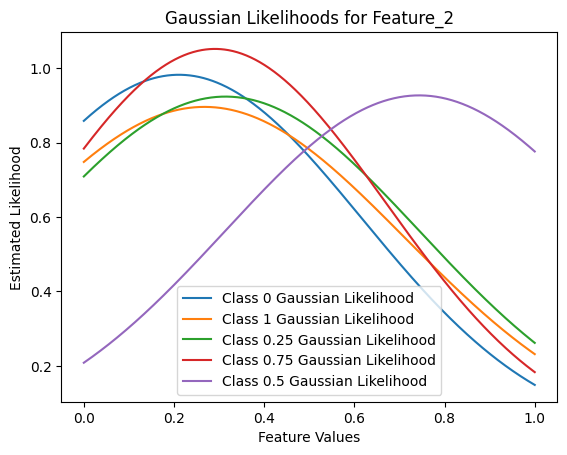

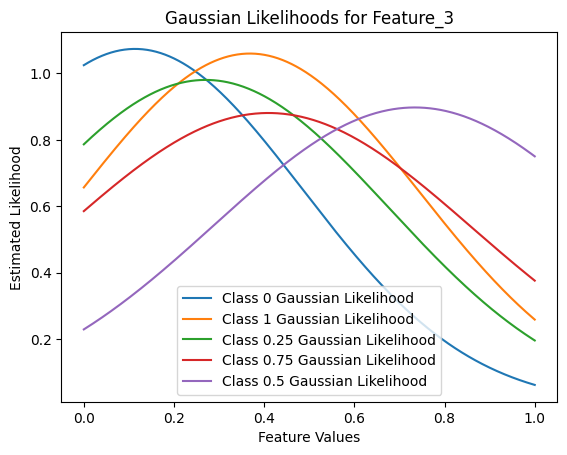

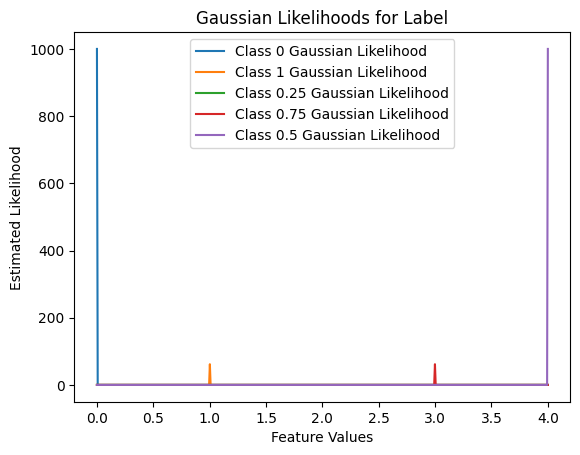

In [45]:

def get_gaussian_likelihood_class_wise(x, feature, class_label):
    data_new = data[feature][data['Label'] == class_label]
    likelihood = get_gaussian_likelihood(x, data_new.mean(), data_new.std())
    return likelihood

for feature in data.columns:
    grid = np.linspace(data[feature].min(), data[feature].max(), 600)

    gaussian_class_0 = [get_gaussian_likelihood_class_wise(x, feature, 0) for x in grid]
    gaussian_class_1 = [get_gaussian_likelihood_class_wise(x, feature, 1) for x in grid]
    gaussian_class_2 = [get_gaussian_likelihood_class_wise(x, feature, 2) for x in grid]
    gaussian_class_3 = [get_gaussian_likelihood_class_wise(x, feature, 3) for x in grid]
    gaussian_class_4 = [get_gaussian_likelihood_class_wise(x, feature, 4) for x in grid]

    plt.plot(grid, gaussian_class_0, label='Class 0 Gaussian Likelihood')
    plt.plot(grid, gaussian_class_1, label='Class 1 Gaussian Likelihood')
    plt.plot(grid, gaussian_class_2, label='Class 0.25 Gaussian Likelihood')
    plt.plot(grid, gaussian_class_3, label='Class 0.75 Gaussian Likelihood')
    plt.plot(grid, gaussian_class_4, label='Class 0.5 Gaussian Likelihood')

    plt.xlabel('Feature Values')
    plt.ylabel('Estimated Likelihood')
    plt.title(f'Gaussian Likelihoods for {feature}')
    plt.legend()
    plt.show()



In [46]:
labels = np.array(data['Label'])
new_data = np.array(data.drop(columns=['Label']))

In [47]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(new_data,labels, test_size=0.10, random_state=42)


In [48]:
def calculate_mean(x):
    return np.mean(x,axis=0)

def calculate_variance(x):
    return np.var(x,axis=0)

def prior_probablity(y):
    classes,counts=np.unique(y,return_counts=True)
    priors = {cls : count/len(y) for cls,count in zip(classes,counts)}
    return priors

def gaussian_probability(x, mean, var):
    eps = 1e-6  
    coeff = 1.0 / np.sqrt(2 * np.pi * var + eps)
    exponent = np.exp(-((x - mean) ** 2) / (2 * var + eps))
    return coeff * exponent

def train_gnb(x,y):
    classes= np.unique(y)
    summaries = {}
    for cls in classes:
        x_cls=x[y==cls]
        summaries[cls]={
            "mean":calculate_mean(x_cls),
            "var":calculate_variance(x_cls)
        }
    priors = prior_probablity(y)

    return summaries,priors

    

def calculate_posterior(X, summaries, priors):
    posteriors = []
    for x in X:
        class_probs = {}
        for cls, params in summaries.items():
            mean = params["mean"]
            var = params["var"]
            likelihood = np.prod(gaussian_probability(x, mean, var))
            posterior = priors[cls] * likelihood
            class_probs[cls] = posterior
        posteriors.append(class_probs)
    return posteriors

def predict(X,summaries,priors):
    posteriors = calculate_posterior(X,summaries,priors)
    predictions=[max(posterior,key=posterior.get) for posterior in posteriors]
    return predictions



In [49]:
summaries,priors = train_gnb(X_train_clf,y_train_clf)
summaries


{np.int64(0): {'mean': array([0.98065984, 0.52104664, 0.10497678, 0.21467028, 0.1166433 ]),
  'var': array([0.67198091, 0.24955704, 0.02110058, 0.02815032, 0.0204168 ])},
 np.int64(1): {'mean': array([1.00219539, 0.51372119, 0.39004872, 0.26527368, 0.36694766]),
  'var': array([0.66739364, 0.24981173, 0.01874426, 0.03970224, 0.02013756])},
 np.int64(2): {'mean': array([0.95995671, 0.49025974, 0.19908924, 0.31481711, 0.27070656]),
  'var': array([0.64882944, 0.24990513, 0.01490923, 0.03456969, 0.02709324])},
 np.int64(3): {'mean': array([0.98868778, 0.52262443, 0.27253779, 0.29031421, 0.41014251]),
  'var': array([0.68312995, 0.24948813, 0.03903946, 0.01996319, 0.04190992])},
 np.int64(4): {'mean': array([0.95898004, 0.49667406, 0.76264419, 0.74362382, 0.73356799]),
  'var': array([0.67791825, 0.24998894, 0.03515877, 0.03401759, 0.03884455])}}

In [50]:
summaries,priors = train_gnb(X_train_clf,y_train_clf)

predictions = predict(X_test_clf,summaries,priors)
predictions


[np.int64(4),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(4),
 np.int64(3),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(4),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(4),
 np.int64(4),
 np.int64(1),
 np.int64(1),
 np.int64(4),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(4),
 np.int64(0),
 np.int64(3),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(0),
 np.int64(4),
 np.int64(0),
 np.int64(0),
 np.int64(3),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(4),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(4),
 np.int64(2),
 np.in

In [51]:
accuracy = np.mean(predictions==y_test_clf)
accuracy

np.float64(0.596)

In [52]:
data = pd.DataFrame(data)
data.columns[:-1]


Index(['Categorical_1', 'Categorical_2', 'Feature_1', 'Feature_2',
       'Feature_3'],
      dtype='object')

In [60]:
training_data = data.sample(frac=0.9,random_state=42)
testing_data = data.drop(training_data.index)
testing_data

,Categorical_1,Categorical_2,Feature_1,Feature_2,Feature_3,Label
4,2,1,0.155401,0.368933,0.169595,0
16,1,1,0.001675,0.037347,0.011454,0
34,0,0,0.622087,0.592480,0.559844,4
64,1,0,0.007050,0.190640,0.008063,0
98,1,1,0.458743,0.401140,0.435940,3
...,...,...,...,...,...,...
4953,1,1,0.954091,0.943043,0.949887,4
4985,2,0,0.050983,0.088221,0.062897,2
4986,0,1,0.444171,0.390943,0.642373,3
4992,2,0,0.444238,0.399750,0.640998,3


In [54]:
class_1_priors = training_data['Label'].value_counts()[1]/len(training_data)
class_2_priors= training_data['Label'].value_counts()[2]/len(training_data)
class_0_priors = training_data['Label'].value_counts()[0]/len(training_data)
class_3_priors = training_data['Label'].value_counts()[3]/len(training_data)
class_4_priors = training_data['Label'].value_counts()[4]/len(training_data)


In [55]:
def get_kde_likelihood_class_wise(x,data_train,label,feature,bandwidth=0.04):
    data_class = data_train[data_train['Label']==label]
    s=0
    for i in range(len(data_class)):
        s=s+get_gaussian_likelihood(x,list(data_class[feature])[i],bandwidth)
    likelihood=s/len(data_class)
    return likelihood

def kde_likelihood_featurewise(test_data,test_data_index,label,data_train):
    p=1
    for feature in data.columns[:-1]:
        l=get_kde_likelihood_class_wise(test_data.iloc[test_data_index][feature],data_train,label,feature)
        p=p*l

    return p

likelihoods_class_wise=[]
for i in range(len(testing_data)):
    class_0 = kde_likelihood_featurewise(testing_data,i,0,training_data)*class_0_priors
    class_1 = kde_likelihood_featurewise(testing_data,i,1,training_data)*class_1_priors
    class_2 = kde_likelihood_featurewise(testing_data,i,2,training_data)*class_1_priors
    class_3 = kde_likelihood_featurewise(testing_data,i,3,training_data)*class_3_priors
    class_4 = kde_likelihood_featurewise(testing_data,i,4,training_data)*class_4_priors
    likelihoods_class_wise.append([class_0,class_1,class_2,class_3,class_4])








In [56]:
y_pred_test = np.argmax(np.array(likelihoods_class_wise),axis=1)



In [57]:
accuracy = np.mean(y_pred_test==np.array(testing_data['Label']))
accuracy

np.float64(0.592)